In [1]:
imagery_path = '/data/coml-satellites/satellite_imagery/esa_10/ZW2015S2/'

In [2]:

import os
available_imagery = [f[:-4] for f in os.listdir(imagery_path)]

FileNotFoundError: [Errno 2] No such file or directory: '/data/coml-satellites/satellite_imagery/esa_10/ET2019S2/'

In [3]:
import pandas as pd
df = pd.read_csv('dhs_centroids_with_pov_full.csv', index_col=0)
df_selected = df[df['CENTROID_ID'].isin(available_imagery)]

NameError: name 'available_imagery' is not defined

In [8]:
df[df['CENTROID_ID'].str.contains('ET2019')]

,CENTROID_ID,SURVEY_NAME,COUNTRY,YEAR,LATNUM,LONGNUM,cluster,health_vac_moddep,health_con_moddep,health_ari_moddep,...,b16,v312,hv001,hv105,hc70,v002,hv025,hv225,hv270,id_y
21012,ET201900000001,Ethiopia_DHS_2019,Ethiopia,2019,14.100614,38.304654,1.0,0.000000,0.0,0.0,...,4.555556,4.500000,1.0,1.611111,-155.611111,89.888889,1.0,0.000000,5.000000,ET201900000001
21013,ET201900000001,Ethiopia_DHS_2019,Ethiopia,2019,14.100614,38.304654,1.0,0.000000,0.0,0.0,...,4.555556,4.500000,1.0,1.611111,-155.611111,89.888889,1.0,0.000000,5.000000,ET201900000001
21014,ET201900000002,Ethiopia_DHS_2019,Ethiopia,2019,13.641345,38.981085,2.0,0.066667,0.0,0.0,...,3.866667,3.600000,2.0,2.266667,-113.866667,101.866667,1.0,0.769231,5.000000,ET201900000002
21015,ET201900000002,Ethiopia_DHS_2019,Ethiopia,2019,13.641345,38.981085,2.0,0.066667,0.0,0.0,...,3.866667,3.600000,2.0,2.266667,-113.866667,101.866667,1.0,0.769231,5.000000,ET201900000002
21016,ET201900000003,Ethiopia_DHS_2019,Ethiopia,2019,13.801030,39.592870,3.0,0.000000,0.0,0.0,...,4.000000,0.750000,3.0,2.000000,-177.437500,118.687500,1.0,0.812500,5.000000,ET201900000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21617,ET201900000303,Ethiopia_DHS_2019,Ethiopia,2019,9.524405,41.834015,303.0,0.181818,0.0,0.0,...,5.818182,0.090909,303.0,2.272727,-131.047619,75.454545,2.0,0.000000,1.181818,ET201900000303
21618,ET201900000304,Ethiopia_DHS_2019,Ethiopia,2019,9.514266,41.770584,304.0,0.107143,0.0,0.0,...,5.928571,0.857143,304.0,2.250000,-138.714286,44.035714,2.0,0.333333,1.428571,ET201900000304
21619,ET201900000304,Ethiopia_DHS_2019,Ethiopia,2019,9.514266,41.770584,304.0,0.107143,0.0,0.0,...,5.928571,0.857143,304.0,2.250000,-138.714286,44.035714,2.0,0.333333,1.428571,ET201900000304
21620,ET201900000305,Ethiopia_DHS_2019,Ethiopia,2019,9.521566,41.739325,305.0,0.147059,0.0,0.0,...,6.147059,0.852941,305.0,2.058824,-179.088235,101.852941,2.0,0.166667,1.852941,ET201900000305


In [86]:
df_selected['imagery_path'] = imagery_path + df_selected['CENTROID_ID']+'.tif'

/tmp/ipykernel_3740526/3572326823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['imagery_path'] = imagery_path + df_selected['CENTROID_ID']+'.tif'


In [87]:
df_selected.dropna(subset=['deprived_sev'],inplace=True)
# df_selected.to_csv('ZW2015_all.csv')

/tmp/ipykernel_3740526/3781420609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(subset=['deprived_sev'],inplace=True)


In [88]:
covariate_dict = {
    'sex': 2,
    'wealth': 5, 
    'age': 17, 
    'dep_housing_sev':1,
    'dep_housing_mod':1,
    'dep_sanitation_sev':1,
    'dep_sanitation_mod':1,
}
covariate_dict.keys()

dict_keys(['sex', 'wealth', 'age', 'dep_housing_sev', 'dep_housing_mod', 'dep_sanitation_sev', 'dep_sanitation_mod'])

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import RidgeCV
from sklearn.dummy import DummyRegressor
df = df_selected
X = df[['sex', 'wealth', 'age']]
y = df['deprived_sev']

In [95]:
pipeline = make_pipeline(
    StandardScaler(),  # Scale numeric data
    # RidgeCV([10000,1000,100,10,1,0.1,0.01,0.001])
    DummyRegressor()
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)

# Evaluating the model using Mean Squared Error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.3107357467371536


<Axes: >

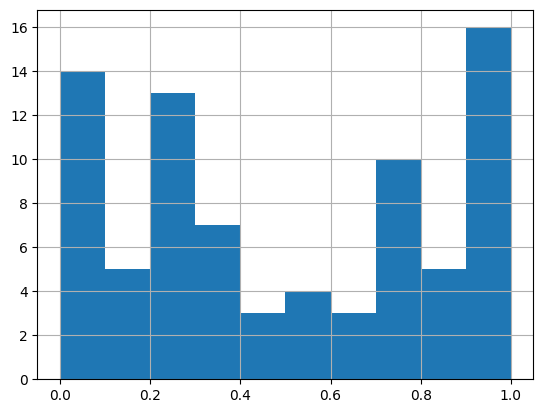

In [96]:
y_test.hist()

In [97]:
predictions

array([0.47667242, 0.47667242, 0.47667242, 0.47667242, 0.47667242,
       0.47667242, 0.47667242, 0.47667242, 0.47667242, 0.47667242,
       0.47667242, 0.47667242, 0.47667242, 0.47667242, 0.47667242,
       0.47667242, 0.47667242, 0.47667242, 0.47667242, 0.47667242,
       0.47667242, 0.47667242, 0.47667242, 0.47667242, 0.47667242,
       0.47667242, 0.47667242, 0.47667242, 0.47667242, 0.47667242,
       0.47667242, 0.47667242, 0.47667242, 0.47667242, 0.47667242,
       0.47667242, 0.47667242, 0.47667242, 0.47667242, 0.47667242,
       0.47667242, 0.47667242, 0.47667242, 0.47667242, 0.47667242,
       0.47667242, 0.47667242, 0.47667242, 0.47667242, 0.47667242,
       0.47667242, 0.47667242, 0.47667242, 0.47667242, 0.47667242,
       0.47667242, 0.47667242, 0.47667242, 0.47667242, 0.47667242,
       0.47667242, 0.47667242, 0.47667242, 0.47667242, 0.47667242,
       0.47667242, 0.47667242, 0.47667242, 0.47667242, 0.47667242,
       0.47667242, 0.47667242, 0.47667242, 0.47667242, 0.47667